# L2 regularization (Ridge regression)

### Ridge regression with scikit-learn

For cross validation metrics, `sklearn` uses a scorer object.

All scorer objects follow the convention that *higher* return values are *better* than *lower* return values.

While higher accuracy is better, a higher RMSE would be worse: to fix this, `sklearn` uses the *negative* RMSE as its scorer metric.

The penalty strength parameter is called `alpha` instead of lambda for uniformity across the library.

### Preparing the data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/another_advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [10]:
X.shape, poly_features.shape, X_train.shape, X_test.shape

((200, 3), (200, 19), (140, 19), (60, 19))

Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

Scaling **only** the training data, scaling the test data would lead to data leakage.

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [17]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

As an example, `alpha=10`

In [19]:
ridge_model = Ridge(alpha=10)

In [20]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [21]:
test_predictions = ridge_model.predict(X_test)

In [22]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, test_predictions)
    mse = metrics.mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.577
MSE 0.8
RMSE 0.895


Now let's compare the model's performance against the training set

In [23]:
train_predictions = ridge_model.predict(X_train)

def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_train, train_predictions)
    mse = metrics.mean_squared_error(y_train, train_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, train_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.529
MSE 0.721
RMSE 0.849


Now we can use cross validation to find the best `alpha` value, making sure only the training data is used.

The default `alphas` are 0.1, 1.0 and 10.0; the default `scoring` is the negative mean squared error.

In [24]:
from sklearn.linear_model import RidgeCV

In [25]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_squared_error')

In [26]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_squared_error')

And it will automatically choose the best `alpha` value between the ones we provided (or the default ones if no arguments are passed).

In [27]:
ridge_cv_model.alpha_

np.float64(0.1)

Now it can be checked against the test set

In [28]:
test_predictions = ridge_cv_model.predict(X_test)

In [29]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, test_predictions)
    mse = metrics.mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.427
MSE 0.382
RMSE 0.618


In [30]:
train_predictions = ridge_cv_model.predict(X_train)

In [31]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_train, train_predictions)
    mse = metrics.mean_squared_error(y_train, train_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, train_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.309
MSE 0.221
RMSE 0.47


In [32]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# L1 regularization (Lasso Regression)

Sometimes written as LASSO as it's an acronym for Least Absolute Shrinkage and Selection Operator.

`LassoCV` in sklearn checks `alphas` values within a range and chooses the best one.

In [33]:
from sklearn.linear_model import LassoCV

The parameters are:
- `eps`: the length of the path (alpha_min / alpha_max), the smaller the value the more alphas will be tested
- `n_alphas`: the number of alphas to test
- `cv`: the number of k-folds

With these parameters, we'll get a warning: `ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.`

In [34]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5)

In [35]:
lasso_cv_model.fit(X_train, y_train)

C:\Lab\Repos\statistics\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.870e+00, tolerance: 3.684e-01
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5)

In [36]:
lasso_cv_model.alpha_

np.float64(0.004943070909225831)

To fix this, we can either increase the number of iterations:

In [37]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=100000)

In [38]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=100000)

In [39]:
lasso_cv_model.alpha_

np.float64(0.004943070909225831)

Or increase the `eps` value to lower the number of alphas to test:

In [40]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [41]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

Notice that the alpha value is, while on a different scale, similar to the one found when the warning was raised and the number of iterations was increased:

In [42]:
lasso_cv_model.alpha_

np.float64(0.4943070909225831)

Given the alpha values, there's a chance the model will not perform as well as the Ridge regression model:

In [43]:
test_predictions = lasso_cv_model.predict(X_test)

In [44]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, test_predictions)
    mse = metrics.mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.654
MSE 1.279
RMSE 1.131


Why is that? Lasso considered only two of the features, while Ridge considered all of them.

Which may be useful if we want to reduce the number of features to work with.

In [45]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Checking against the increased number of iterations, we get a more complex and better performing model, more in line with the results we got from the Ridge regression model:

In [46]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [47]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [48]:
test_predictions = lasso_cv_model.predict(X_test)

In [49]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, test_predictions)
    mse = metrics.mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

MAE 0.434
MSE 0.368
RMSE 0.606


In [50]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# L1 and L2 regularization combined (Elastic Net)

The `l1_ratio` parameter is the mixing parameter between L1 and L2 regularization: a good choice of values is often to put more values close to 1 (L1) and less close to 0 (L2).

The `tol` parameter is the tolerance for the optimization, meaning the algorithm will stop when the loss or the dual gap is below this value.

In [51]:
from sklearn.linear_model import ElasticNetCV

In [52]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [53]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [54]:
elastic_model.l1_ratio_

np.float64(1.0)

In [55]:
test_predictions = elastic_model.predict(X_test)

In [56]:
def model_error_evaluation():
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test,test_predictions)
    mse = metrics.mean_squared_error(y_test,test_predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,test_predictions))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))

model_error_evaluation()

MAE 0.566
MSE 0.56
RMSE 0.749


In [57]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])

### Early Stopping

A very different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*.

As the epochs go by, the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while, though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

In [58]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

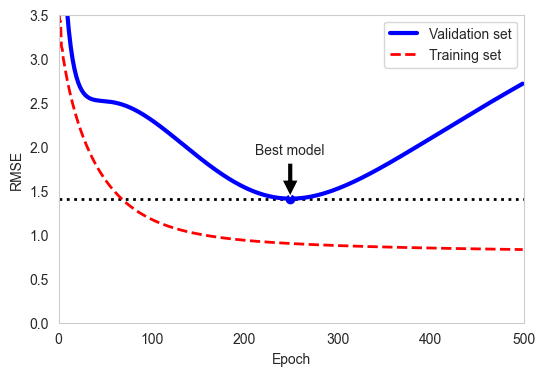

In [59]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

With stochastic and mini-batch gradient descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.